In [30]:
#importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [31]:
#reading the file
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
#making two new data frame df1 and dropping the column species and a seprate data frame target for storing target column
df1=df.drop('Species',axis='columns')
target=pd.DataFrame()
target['Species']=df['Species']
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [33]:
#displaying target data frame
target

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [34]:
#encoding the species of iris i.e target data frame
le_species=LabelEncoder()
target['species_n']= le_species.fit_transform(target['Species'])
target

,Species,species_n
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0
...,...,...
145,Iris-virginica,2
146,Iris-virginica,2
147,Iris-virginica,2
148,Iris-virginica,2


In [35]:
#making a new data frame 'n_target' that only contains the encoded values of species from 'target' data frame
n_target=pd.DataFrame()
n_target['encoded_species']=target['species_n']
n_target


,encoded_species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [36]:
#setting the training size and testing size 
X_train, X_test, y_train, y_test = train_test_split(df1, n_target['encoded_species'] , 
                            test_size=0.2, random_state=0) 


In [37]:
#forming decision tree classifier
data_clf=tree.DecisionTreeClassifier()
data_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
#finding score to check the accuracy of model
data_clf.score(X_train, y_train)

1.0

In [39]:
#testing the data
print(X_test)
# Predicting the type of iris
y_pred = data_clf.predict(X_test)
print(y_pred)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
114  115            5.8           2.8            5.1           2.4
62    63            6.0           2.2            4.0           1.0
33    34            5.5           4.2            1.4           0.2
107  108            7.3           2.9            6.3           1.8
7      8            5.0           3.4            1.5           0.2
100  101            6.3           3.3            6.0           2.5
40    41            5.0           3.5            1.3           0.3
86    87            6.7           3.1            4.7           1.5
76    77            6.8           2.8            4.8           1.4
71    72            6.1           2.8            4.0           1.3
134  135            6.1           2.6            5.6           1.4
51    52            6.4           3.2            4.5           1.5
73    74            6.1           2.8            4.7           1.2
54    55            6.5           2.8            4.6          

In [40]:
# Comparing Actual and Predicted values by creating a new data frame 
df2= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,1
40,0,0
86,1,1
76,1,1
71,1,1


[Text(200.88000000000002, 181.2, 'X[0] <= 101.0\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(133.92000000000002, 108.72, 'X[3] <= 2.35\ngini = 0.5\nsamples = 76\nvalue = [39, 37, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 44\nvalue = [0, 0, 44]')]

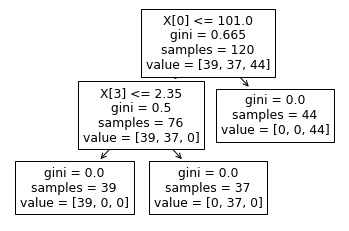

In [41]:
tree.plot_tree(data_clf)